# Polynomial Regression 
### Camara Data Speed Prediction

## Data preprocessing

## Importing the libraries

In [1]:
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics, svm, ensemble
import pandas as pd
import tabpy_client

In [2]:
from sklearn import set_config
set_config(print_changed_only=False)

## Importing the dataset

In [3]:
# Read the csv file into a pandas DataFrame
speed = pd.read_csv('camera_data_preparation.csv')
speed.head()

,Date,Time,Lane,Speed,Hour,Temperature,Precipitation,Wind Speed,Wind Direction,Conditions,Weekday,Time of Day,Ave Speed Hour,Ave Speed Time of Day,Ave Speed Lane,Ave Speed Weekday,Speeder
0,2/08/2021,0:00:27,2,52.047,0,7.6,0.0,7.6,18,Clear,Monday,0,50.982963,51.159533,44.238934,43.783477,0
1,2/08/2021,0:03:35,2,62.480,0,7.6,0.0,7.6,18,Clear,Monday,0,50.982963,51.159533,44.238934,43.783477,1
2,2/08/2021,0:05:48,1,58.433,0,7.6,0.0,7.6,18,Clear,Monday,0,50.982963,51.159533,42.730847,43.783477,0
3,2/08/2021,0:07:49,2,53.870,0,7.6,0.0,7.6,18,Clear,Monday,0,50.982963,51.159533,44.238934,43.783477,0
4,2/08/2021,0:15:41,2,45.373,0,7.6,0.0,7.6,18,Clear,Monday,0,50.982963,51.159533,44.238934,43.783477,0


In [4]:
# Drop extra columns
speed = speed.drop(columns=['Date','Time','Hour','Temperature','Precipitation','Wind Speed','Wind Direction','Conditions',
                            'Ave Speed Hour','Ave Speed Lane', 'Ave Speed Weekday',"Speeder","Speed"])
speed.head()
speed.to_csv('C:/Users/aleja/OneDrive/Bootcamp/projects/Final Project/Data Project Presentation/speedaverage1.csv')

In [5]:
# Use LabelEncoder to convert textual classifications to numeric. 
# We will use the same encoder later to convert them back.
encoder = preprocessing.LabelEncoder()
speed['Weekday'] = encoder.fit_transform(speed['Weekday'])

In [6]:
speed.head()
speed.to_csv('C:/Users/aleja/OneDrive/Bootcamp/projects/Final Project/Data Project Presentation/speedaverage.csv')

## Encoding categorical data

### Encoding the Independent Variable

In [7]:
speed = pd.get_dummies(speed)
speed.head()

,Lane,Weekday,Time of Day,Ave Speed Time of Day
0,2,1,0,51.159533
1,2,1,0,51.159533
2,1,1,0,51.159533
3,2,1,0,51.159533
4,2,1,0,51.159533


In [8]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = speed[["Lane","Weekday","Time of Day"]]
y = speed["Ave Speed Time of Day"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(152595, 3) (152595, 1)


## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,Lane,Weekday,Time of Day
53275,2,6,2
106729,1,0,4
69480,1,6,1
63092,2,6,1
100103,2,0,2


# Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [11]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

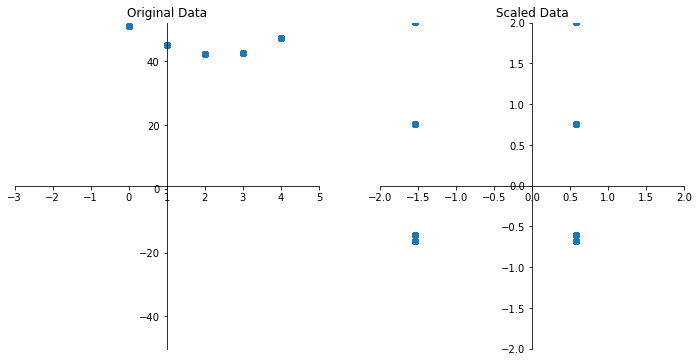

In [12]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Time of Day"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Time of Day"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression
lin_reg(X, y)


LinearRegression(copy_X=True,
                 fit_intercept=        Lane  Weekday  Time of Day
0          2        1            0
1          2        1            0
2          1        1            0
3          2        1            0
4          2        1            0
...      ...      ...          ...
152590     2        3            4
152591     2        3            4
152592     2        3            4
152593     2        3            4
152594     2        3            4

[152595 rows x 3 columns],
                 n_jobs=None,
                 normalize=array([[51.15953314],
       [51.15953314],
       [51.15953314],
       ...,
       [47.45648025],
       [47.45648025],
       [47.45648025]]))

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[45.15 45.11]
 [45.15 45.11]
 [47.05 47.46]
 ...
 [45.12 45.11]
 [47.05 47.46]
 [45.12 45.11]]


In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.983423164034893

In [17]:
X_test

,Lane,Weekday,Time of Day
128127,2,2,1
104228,1,0,1
127979,1,2,4
131643,2,2,4
47822,2,6,2
...,...,...,...
119307,2,0,3
109115,1,0,3
99123,2,0,1
139663,1,2,4


In [18]:
y_pred

array([[45.15],
       [45.15],
       [47.05],
       ...,
       [45.12],
       [47.05],
       [45.12]])

In [19]:
y_test

array([[45.11],
       [45.11],
       [47.46],
       ...,
       [45.11],
       [47.46],
       [45.11]])

In [20]:
pd.DataFrame(X_train).to_csv("X_train.csv")

In [21]:
# Individual function to use the model with params Time of day, lane, day of week indicated as binary (0,1) sequence

result = regressor.predict(poly_reg.fit_transform([[0,2,4]]))
result

array([[46.93]])

In [22]:
# Connect to TabPy server using the client library
# tabpy must be starter on console first
connection = tabpy_client.Client('http://localhost:9004/')

In [23]:
# The function to be used in tableau to get a speed prediction
def FindAverageSpeed(iTimeOfDay, iLane, iDay):
    X = np.column_stack([iTimeOfDay,iLane, iDay])
    return regressor.predict(poly_reg.fit_transform(X)).tolist()


In [24]:
# Deploy the end point to be used by tableu
connection.deploy('SpeedFinder',
                  FindAverageSpeed,
                  'Returns expected speed for lane and day of week combination', override = True)

In [25]:
connection.query('SpeedFinder',1,1,3)

{'response': [[42.76723014130536]],
 'version': 42,
 'model': 'SpeedFinder',
 'uuid': '69086550-61ab-4947-9321-c20ec624fa63'}